<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [227]:
#Importation de la librairie Pandas et Numpy
import pandas as pd
import numpy as np

In [228]:
#Importation de la librairie plotly express et matplotlib.pyplot
import plotly.express as px
import matplotlib.pyplot as plt

In [229]:
# Importation de la librairire stats de scipy
from scipy import stats

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [230]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("ressources/web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("ressources/erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("ressources/liaison.xlsx")

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

In [231]:
# définition d'une fontion d'analyse exploratoire pour toutes les colonnes numériques que nous allons analyser
def analyse_exploratoire(df, key, name):
    '''Affiche une synthèse des valeurs, les valeurs non renseignées et les valeurs négatives d'une colonne de df'''
    print('Analyse exploratoire de la colonne "{}": '.format(key))
    # Afficher le nom de la dataframe
    print("Quantité de {} non renseigné(e)s : {}".format(name, df.loc[df[key].isna()].shape[0]))
    print("Quantité de {} négatif(ve)s : {}".format(name, df.loc[df[key] < 0].shape[0]))
    print("Quantité de {} nul(le)s : {}".format(name, df.loc[df[key] == 0].shape[0]))
    print("Valeur minimale en valeur absolue de {} : {}".format(name, df[key].abs().min()))
    print("Valeur maximale de {} : {}".format(name, df[key].max()))
    print("Valeurs :\n{}".format(df[key].value_counts()))

In [232]:
# définition d'une fontion d'analyse exploratoire pour toutes les colonnes au format date que nous allons analyser
def analyse_exploratoire_date(df, key, name):
    '''Affiche une synthèse des valeurs, les valeurs non renseignées et les valeurs négatives d'une colonne de df'''
    print('Analyse exploratoire de la colonne "{}": '.format(key))
    # Afficher le nom de la dataframe
    print("Quantité de {} non renseigné(e)s : {}".format(name, df.loc[df[key].isnull()].shape[0]))
    print("Valeur minimale de {} : {}".format(name, df[key].min()))
    print("Valeur maximale de {} : {}".format(name, df[key].max()))
    print("Valeurs :\n{}".format(df[key].value_counts()))

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse des caractéristiques générales fichier erp.xlsx</h4>
</div>

In [233]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [234]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [235]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [236]:
# Réorganisation des colonnes
df_erp = df_erp[['product_id', 'onsale_web', 'price', 'purchase_price', 'stock_quantity', 'stock_status']]

In [237]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
df_erp.loc[df_erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,purchase_price,stock_quantity,stock_status


Tous les product_id sont uniques : on définit cette colonne comme l'index 

In [238]:
df_erp = df_erp.set_index('product_id')

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.2 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h4>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h5 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.2.1 - Analyse de la variable STOCK_STATUS</h>
</div>

In [239]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
df_erp["stock_status"].value_counts()

stock_status
instock       733
outofstock     92
Name: count, dtype: int64

La valeur de stock_quantity est liée à stock_status : stock_status doit prendre la valeur 'outofstock' si et seulement si 'stock_quantity' = 0.

Les valeurs négatives de stock sont à étudier ainsi que les lignes ne respectant pas la règle ci-dessus.

In [240]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp["stock_status_2"] = 'instock'
mask = df_erp['stock_quantity'] == 0
df_erp.loc[mask, 'stock_status_2'] = 'outofstock'

In [241]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]
#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter


product_id
3847     True
3849     True
3850     True
4032     True
4039    False
        ...  
7203     True
7204     True
7247     True
7329     True
7338     True
Length: 825, dtype: bool

In [242]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 825 qui correspond au nombre de lignes dans ce dataset
print("Pour {} produits, nous avons {} lignes dans df_erp où 'stock_status' = 'stock_status_2'".format(df_erp.shape[0],(df_erp["stock_status"] == df_erp["stock_status_2"]).sum()))

Pour 825 produits, nous avons 821 lignes dans df_erp où 'stock_status' = 'stock_status_2'


Les valeurs de 'stock_status' et celle de 'stock_status_2', calculée à partir de 'stock_quantity', diffèrent sur 4 produits

In [243]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
mask = df_erp['stock_status'] != df_erp['stock_status_2']
df_erp.loc[mask,:]

,onsale_web,price,purchase_price,stock_quantity,stock_status,stock_status_2
product_id,,,,,,
4039,1,46.0,23.77,3,outofstock,instock
4885,1,18.7,9.66,0,instock,outofstock
4973,0,10.0,4.96,-10,outofstock,instock
5700,1,44.5,22.30,-1,outofstock,instock


In [244]:
# Vérification des valeurs stock_quantity négatives
mask = df_erp['stock_quantity'] < 0
df_erp.loc[mask]
# lignes déja présentes dans l'analyse précédente

,onsale_web,price,purchase_price,stock_quantity,stock_status,stock_status_2
product_id,,,,,,
4973,0,10.0,4.96,-10,outofstock,instock
5700,1,44.5,22.30,-1,outofstock,instock


In [245]:
#Corriger la ou les données incohérentes
# Valeurs négatives dans le sotck -> remplacement par zéro
mask = df_erp['stock_quantity'] < 0
df_erp.loc[mask,'stock_quantity'] = 0
# stock_quantity > 0 -> On assigne 'instock' à stock_status 
mask = df_erp['stock_quantity'] > 0
df_erp.loc[mask,'stock_status'] = 'instock'
# stock_quantity = 0 -> On assigne 'outofstock' à stock_status 
mask = df_erp['stock_quantity'] == 0
df_erp.loc[mask,'stock_status'] = 'outofstock'
#Verification en utilisant le même code que plus haut pour afficher les problemes
df_erp["stock_status_2"] = 'instock'
mask = df_erp['stock_quantity'] == 0
df_erp.loc[mask, 'stock_status_2'] = 'outofstock'
mask = df_erp['stock_status'] != df_erp['stock_status_2']
df_erp.loc[mask,:]
df_erp.head()

,onsale_web,price,purchase_price,stock_quantity,stock_status,stock_status_2
product_id,,,,,,
3847,1,24.2,12.88,16,instock,instock
3849,1,34.3,17.54,10,instock,instock
3850,1,20.8,10.64,0,outofstock,outofstock
4032,1,14.1,6.92,26,instock,instock
4039,1,46.0,23.77,3,instock,instock


In [246]:
# On peut maintenant supprimer les colonnes stock_status et stock_status_2
# car l'information est donnée par la colonne stock_quantity
df_erp = df_erp.drop(['stock_status','stock_status_2'], axis=1)

<div style="border: 1px solid RGB(51,165,182);" >
<h5 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.2.2 - Analyse de la variable PRICE</h5>
</div>

In [247]:
###############
## LES PRIX  ##
###############
#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
analyse_exploratoire(df_erp, 'price', 'prix')
# Pas de prix non renseignés
# Afficher les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print('\n Prix négatifs :')
df_erp.loc[df_erp['price'] <= 0]


Analyse exploratoire de la colonne "price": 
Quantité de prix non renseigné(e)s : 0
Quantité de prix négatif(ve)s : 3
Quantité de prix nul(le)s : 0
Valeur minimale en valeur absolue de prix : 5.2
Valeur maximale de prix : 225.0
Valeurs :
price
45.0    15
31.0    13
19.0     9
40.0     8
13.5     8
        ..
18.1     1
14.0     1
30.1     1
34.5     1
8.4      1
Name: count, Length: 383, dtype: int64

 Prix négatifs :


,onsale_web,price,purchase_price,stock_quantity
product_id,,,,
4233,0,-20.0,10.33,0
5017,0,-8.0,4.34,0
6594,0,-9.1,4.61,19


Nettoyage : 

On observe 3 produits dont le prix de vente est négatif, tous non vendus en lignes, et dont 1 est en stock.

En comparant au prix d'achat, il semble cohérent de supposer que le prix a été saisi négatif par erreur, on remplace donc ces prix par leur valeur absolue

In [248]:
# On remplace ces valeurs par leur opposé
df_erp.loc[mask,'price'] = -df_erp.loc[mask,'price']
df_erp.loc[mask]

,onsale_web,price,purchase_price,stock_quantity
product_id,,,,


<div style="border: 1px solid RGB(51,165,182);" >
<h5 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.2.3 - Analyse de la variable STOCK_QUANTITY</h5>
</div>

In [249]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
#Afficher la quantité maximum de la colonne "stock_quantity"
analyse_exploratoire(df_erp, 'stock_quantity', 'nombre en stock')

Analyse exploratoire de la colonne "stock_quantity": 
Quantité de nombre en stock non renseigné(e)s : 0
Quantité de nombre en stock négatif(ve)s : 0
Quantité de nombre en stock nul(le)s : 92
Valeur minimale en valeur absolue de nombre en stock : 0
Valeur maximale de nombre en stock : 145
Valeurs :
stock_quantity
0     92
7     32
23    30
12    29
5     27
      ..
50     1
74     1
86     1
91     1
55     1
Name: count, Length: 82, dtype: int64


Les quantités négatives ont été rectifiées (passage en valeur absolue) lors de l'analyse de la variable 'stock_status'

<div style="border: 1px solid RGB(51,165,182);" >
<h5 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.2.4 - Analyse de la variable ONSALE_WEB</h5>
</div>

In [250]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient. Que signifient-elles?
df_erp["onsale_web"].value_counts()

onsale_web
1    716
0    109
Name: count, dtype: int64

716 produits référencés comme vendus en ligne ('onsale_web' = 1) et 109 produits non vendus en ligne ('onsale_web'=0)

<div style="border: 1px solid RGB(51,165,182);" >
<h5 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.2.5 - Analyse de la variable PURCHASE_PRICE</h5>
</div>

In [251]:
######################
##   prix d'achat   ##
######################
#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
#Afficher le prix minimum de la colonne "purchase_price"
analyse_exploratoire(df_erp, 'purchase_price', "prix d'achat")

Analyse exploratoire de la colonne "purchase_price": 
Quantité de prix d'achat non renseigné(e)s : 0
Quantité de prix d'achat négatif(ve)s : 0
Quantité de prix d'achat nul(le)s : 0
Valeur minimale en valeur absolue de prix d'achat : 2.74
Valeur maximale de prix d'achat : 137.81
Valeurs :
purchase_price
10.31    4
5.01     4
12.40    4
24.18    4
4.81     4
        ..
27.88    1
28.16    1
6.03     1
32.01    1
13.42    1
Name: count, Length: 660, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.1 - Analyse des caractéristiques générales du dataset</h4>
</div>

In [252]:
#Dimension du dataset
#Nombre d'observations
print("Nombre d'observations : {}".format(df_web.shape[0]))
#Nombre de caractéristiques
print("Nombre de caractéristiques / colonnes : {}".format(df_web.shape[1]))

Nombre d'observations : 1513
Nombre de caractéristiques / colonnes : 29


In [253]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [254]:
# Il semble y avoir 1430 lignes non nulles pour 1513 lignes au total, soit 83 lignes nulles
# Identification des lignes vides par un masque, et suppression des lignes concernées de df_web
df_web_temp = df_web.replace(0, np.nan)
mask = df_web_temp.isnull().all(axis=1)
print("Nombre de lignes vides dans df_web : {}".format(mask.sum()))
df_web = df_web[~mask]

Nombre de lignes vides dans df_web : 83


df_web contient 1513 lignes dont 83 sont vides. après nettoyage, il reste 1430 lignes.

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.2 - Sélection des colonnes à conserver</h4>
</div>

In [255]:
#Selon vous, quelles sont les colonnes à conserver ?
# Visulation des valeurs de la table df_web
for k in df_web.keys():
    print("\nColonne {} :".format(k))
    print(df_web[k].value_counts())


Colonne sku :
sku
bon-cadeau-25-euros    2
14773                  2
14905                  2
14899                  2
14897                  2
                      ..
15747                  2
15746                  2
15745                  2
15741                  2
38                     2
Name: count, Length: 714, dtype: int64

Colonne virtual :
virtual
0    1430
Name: count, dtype: int64

Colonne downloadable :
downloadable
0    1430
Name: count, dtype: int64

Colonne rating_count :
rating_count
0    1430
Name: count, dtype: int64

Colonne average_rating :
average_rating
0.0    1430
Name: count, dtype: int64

Colonne total_sales :
total_sales
 7.0      140
 9.0      140
 10.0     130
 8.0      120
 6.0      113
 5.0      108
 11.0     101
 12.0      98
 4.0       94
 13.0      86
 3.0       82
 0.0       50
 2.0       41
 15.0      34
 14.0      30
 1.0       22
 16.0      14
 17.0       6
 22.0       4
 20.0       4
 36.0       2
 18.0       2
 27.0       2
 24.0       2
 122.0  

Après visualisation des valeurs des colonnes, on fait le premier tri suivant.

A supprimer car aucune valeur : 
- virtual = 0 
- downloadable = 0
- rating_count = 0
- average_rating = 0 ou Nan
- tax_class = Nan
- post_content = Nan
- post_password = Nan
- post_content_filtered = Nan
- post_parent = 0 ou Nan
- menu_order = 0 ou Nan
- comment_count = 0 ou Nan

A supprimer car valeur toujours identique (aucune donnée apportée) :
- tax_status = 'taxable' lorsque 'post_type' = 'product' et NaN lorsque 'post_type' = 'attachment'
- post_status = 'publish'
- comment_status = 'closed'
- ping_status = 'closed
- post_mime_type = 'image/jpg'

A supprimer car redondants : 
- post_date_gmt -> post_date
- post_modified_gmt -> post_modified
- post_name -> post_title

On conserve 'post_type' dans un premier temps car il donne une indication sur la nature de la valeur de la colonne 'guid' ('product' ou 'attachment')

In [256]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
keys_to_drop = ['virtual','downloadable','rating_count',
                     'average_rating', 'tax_class','post_content', 'post_status',
                     'comment_status','ping_status',
                     'post_password','post_content_filtered', 'post_parent',
                     'menu_order', 'post_mime_type','comment_count']
keys_to_drop += ['post_date_gmt','post_name','post_modified_gmt', 'tax_status']
df_web = df_web.drop(keys_to_drop, axis = 1)

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.3 - Analyse de la variable SKU / ID_WEB</h4>
</div>

In [257]:
# Renommons pour toute la suite la colonne "sku" par "id_web"
df_web = df_web.rename({'sku':'id_web'}, axis = 1)

In [258]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
# 1428 lignes et 714 doublons, soit 100 % de lignes dupliquées
mask = ~df_web['id_web'].isna()
df_web_id_renseigne = df_web.loc[mask, :]
print("Nombre de lignes de la table df_web : {}".format(df_web.shape[0]))
print("Nombre de lignes avec id_web renseigné : {}".format(df_web_id_renseigne.shape[0]))
print("Nombre de lignes doublons pour id_web   : {}".format(df_web_id_renseigne.loc[df_web_id_renseigne['id_web'].duplicated() , :].shape[0]))

Nombre de lignes de la table df_web : 1430
Nombre de lignes avec id_web renseigné : 1428
Nombre de lignes doublons pour id_web   : 714


In [259]:
#Visualisation des valeurs de la colonne id_web
df_web['id_web'].value_counts()

id_web
bon-cadeau-25-euros    2
14773                  2
14905                  2
14899                  2
14897                  2
                      ..
15747                  2
15746                  2
15745                  2
15741                  2
38                     2
Name: count, Length: 714, dtype: int64

Les id_web sont de type integer, à quelques exceptions près à identifier

In [260]:
# Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
# Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?

In [261]:
# On crée une fonction is_int pour créer vérifier si une variable est un entier 
def is_int(value):
    try:
        float(value)
        return   int(value) == value
    except ValueError:
        return False
# Masque des valeurs non integer de id_web
mask = ~df_web_id_renseigne['id_web'].apply(is_int)
# Stockage des valeurs non integer dans une liste id_web_non_valide (avec unicité des valeurs)
id_web_non_valide = df_web_id_renseigne.loc[mask,'id_web'].unique().tolist()
# On crée un dataframe avec tous les autres id_web (donc sous format int) pour analyse par la suite
df_web_id_int = df_web_id_renseigne.loc[~mask,:]
print("Valeurs non integer de id_web : ")
df_web_id_renseigne.loc[mask,:].style.format()

Valeurs non integer de id_web : 


,id_web,total_sales,post_author,post_date,product_type,post_title,post_excerpt,post_modified,guid,post_type
0,bon-cadeau-25-euros,7.000000,1.000000,2018-06-01 13:53:46,Autre,Bon cadeau de 25€,nan,2018-06-01 14:13:57,https://www.bottle-neck.fr/wp-content/uploads/2020/03/bon-cadeau-de-25-euros.jpg,attachment
1,bon-cadeau-25-euros,7.000000,1.000000,2018-06-01 13:53:46,nan,Bon cadeau de 25€,"Parlons peu, parlons vin. Parlons cadeau ! Un bon cadeau à offrir à vos proches... sans modération !",2018-06-01 14:13:57,https://www.bottle-neck.fr/?post_type=product&p=4954,product
2,13127-1,4.000000,2.000000,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche florale et un parfum de vendange entière. Il évolue sur une note d'agrume. Bouche avec du relief et une belle énergie. Il y a du muscle mais accompagné par une sensation de fruit plein et dense.",2020-07-20 17:09:06,https://www.bottle-neck.fr/?post_type=product&p=7247,product
3,13127-1,4.000000,2.000000,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,nan,2020-07-20 17:09:06,https://www.bottle-neck.fr/wp-content/uploads/2020/03/clos-du-mont-olivet-chateauneuf-du-pape-2007-2.jpg,attachment


In [262]:
print('id_web non valides : ')
print(id_web_non_valide)

id_web non valides : 
['bon-cadeau-25-euros', '13127-1']


2 id_web ne respectent pas la codification : nous leur affecterons un nouvel id

In [263]:
# lecture des valeurs integer de id_web
print("Valeur minimale de id_web : {}".format(df_web_id_int['id_web'].min()))
print("Valeur maximale de id_web : {}".format(df_web_id_int['id_web'].max()))

Valeur minimale de id_web : 38
Valeur maximale de id_web : 19822


In [264]:
#Identifier les lignes sans code articles
print("Index des lignes sans code article : \
      {}".format(df_web.loc[df_web['id_web'].isnull(),:].index.tolist()))
df_web.loc[df_web['id_web'].isnull(),:]

Index des lignes sans code article :       [1493, 1495]


,id_web,total_sales,post_author,post_date,product_type,post_title,post_excerpt,post_modified,guid,post_type
1493,NaN,-56.0,2.0,2018-08-08 11:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",2019-11-02 13:24:01,https://www.bottle-neck.fr/?post_type=product&...,product
1495,NaN,-17.0,2.0,2018-07-31 12:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",2019-11-02 13:24:15,https://www.bottle-neck.fr/?post_type=product&...,product


In [265]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_web_id_nul = df_web.loc[df_web['id_web'].isnull(),:]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeurs renseignées dans chacune des colonnes
df_web_id_nul.info()
#3 - Que constatez-vous?

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 1493 to 1495
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_web         0 non-null      object        
 1   total_sales    2 non-null      float64       
 2   post_author    2 non-null      float64       
 3   post_date      2 non-null      datetime64[ns]
 4   product_type   2 non-null      object        
 5   post_title     2 non-null      object        
 6   post_excerpt   2 non-null      object        
 7   post_modified  2 non-null      datetime64[ns]
 8   guid           2 non-null      object        
 9   post_type      2 non-null      object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 176.0+ bytes


La table ne contient pas les lignes vides car elles ont déjà été supprimées

Il reste 2 lignes de df_web parfaitement remplies mais sans id_web

Seules la valeur total_sale de ces lignes pose problème car négative : à analyser sur l'ensemble de la table par la suite

In [266]:
# Pour les codes articles identifiés, réalisez une analyse et définissez l'action à entreprendre
# Enregistrement de l'index des produits concernés pour assignation du nouvel id_web
mask = ~df_web_id_nul['post_title'].isnull()
df_web_id_nul_a_saisir = df_web_id_nul.loc[mask,:]
df_web_id_nul_a_saisir
# Attention à ne pas modifier les indexes de df_web et df_web_id_nul_a_saisir car c'est la seule manière de les relier

,id_web,total_sales,post_author,post_date,product_type,post_title,post_excerpt,post_modified,guid,post_type
1493,NaN,-56.0,2.0,2018-08-08 11:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",2019-11-02 13:24:01,https://www.bottle-neck.fr/?post_type=product&...,product
1495,NaN,-17.0,2.0,2018-07-31 12:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",2019-11-02 13:24:15,https://www.bottle-neck.fr/?post_type=product&...,product


Affectation d' id_web corrects aux lignes présentant un id_web incorrect ou nul

In [267]:
# Affectons un nouvel id_web pour les lignes à conserver
# Calculons la valeur maximale de id_web pour affecter les nouveaux id_web 
id_web_max = df_web_id_int['id_web'].max()
print("Valeur maximale d'id_web avant assignation des nouveaux id_web : {}".format(id_web_max))
# On assignes les nouveaux id_web aux produits de la liste id_web_non_valide
list_new_id_web = [] # On stocke les nouveaux id_web assignés dans cette liste
df_web.loc[df_web['id_web'] == 'bon-cadeau-25-euros', 'id_web'] = id_web_max + 1
df_web.loc[df_web['id_web'] == '13127-1', 'id_web'] = id_web_max + 2
list_new_id_web += [id_web_max + 1, id_web_max + 2] # stockage des nouveaux id_web
id_web_max += 2
# On assigne les nouveaux id_web aux produits sans id_web identifiés précédemment
i = df_web_id_nul_a_saisir.loc[mask,:].index.values # indice des lignes sans id_web à conserver
l = len(i) # nombre de lignes sans id_web à conserver
# assignation des nouveaux id_web à partir de id_web_max calculé précédemment
df_web.loc[i, 'id_web'] = range(id_web_max+1,id_web_max+1+l) 
list_new_id_web += range(id_web_max+1,id_web_max+1+l) # stockage des nouveaux id_web
id_web_max += l # mise à jour de l'indice max d'id_web
print("Valeur des nouveaux id_web affectés :  : {}".format(list_new_id_web))

Valeur maximale d'id_web avant assignation des nouveaux id_web : 19822
Valeur des nouveaux id_web affectés :  : [19823, 19824, 19825, 19826]


In [268]:
# Affichage de nos lignes modifiées
df_web.loc[df_web['id_web'].isin(list_new_id_web)]

,id_web,total_sales,post_author,post_date,product_type,post_title,post_excerpt,post_modified,guid,post_type
0,19823,7.0,1.0,2018-06-01 13:53:46,Autre,Bon cadeau de 25€,NaN,2018-06-01 14:13:57,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1,19823,7.0,1.0,2018-06-01 13:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",2018-06-01 14:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
2,19824,4.0,2.0,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",2020-07-20 17:09:06,https://www.bottle-neck.fr/?post_type=product&...,product
3,19824,4.0,2.0,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,2020-07-20 17:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1493,19825,-56.0,2.0,2018-08-08 11:23:43,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",2019-11-02 13:24:01,https://www.bottle-neck.fr/?post_type=product&...,product
1495,19826,-17.0,2.0,2018-07-31 12:07:23,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",2019-11-02 13:24:15,https://www.bottle-neck.fr/?post_type=product&...,product


A voir si on conserve

In [269]:
# Ajouter ces nouveaux id_web à la table df_liaison grâce à l'id de produit donné 
# dans l'adresse du guide (19825 -> 5075 et 19826 -> 5070)
# Vérification que les id_web n'y sont pas renseignés : ok
df_liaison[df_liaison['product_id'].isin([5075,5070])]

,id_web,product_id
762,NaN,5070
763,NaN,5075


In [270]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1430 entries, 0 to 1495
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_web         1430 non-null   object        
 1   total_sales    1430 non-null   float64       
 2   post_author    1430 non-null   float64       
 3   post_date      1430 non-null   datetime64[ns]
 4   product_type   1429 non-null   object        
 5   post_title     1430 non-null   object        
 6   post_excerpt   716 non-null    object        
 7   post_modified  1430 non-null   datetime64[ns]
 8   guid           1430 non-null   object        
 9   post_type      1430 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 155.2+ KB


On a maintenant supprimé toutes les lignes sans données et affecté de nouveaux id_web

Supprimons les doublons pour n'avoir qu'une seule ligne par id_web et pouvoir l'utiliser comme clé / index

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.3 - Gestion des doublons</h4>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h5 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.3.1 - Identification de la présence de doublons</h5>
</div>

In [271]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
# 1428 lignes et 714 doublons, soit 100 % de lignes dupliquées
mask = ~df_web['id_web'].isna()
df_web_id_renseigne = df_web.loc[mask, :]
print("Nombre de lignes de la table df_web : {}".format(df_web.shape[0]))
print("Nombre de lignes en doublons pour id_web   : {}".format(df_web.loc[df_web_id_renseigne['id_web'].duplicated() , :].shape[0]))

Nombre de lignes de la table df_web : 1430
Nombre de lignes en doublons pour id_web   : 714


<div style="border: 1px solid RGB(51,165,182);" >
<h5 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.3.2 - Fusion des lignes doublons par un pivot</h5>
</div>

On fusionne dans un premier temps les lignes doublons, en conservant toutes les données par la démultiplication des colonnes nécessaires : utilisation d'un pivot

In [272]:
list = df_web.columns.values[1:] # liste des noms de colonnes de df_web qui dont le contenu va être analysé
 # tri préalable sur tax_status qui permet d'obtenir un indice de doublon cohérent sur l'ensemble (voir le résultat)
df_web = df_web.sort_values(by='post_type', ascending=False)
df_web["doublon"] = df_web.groupby("id_web").cumcount() # création de l'indice 'doublon' pour chaque ligne
# Créer un pivot sur la table df_web pour obtenir une ligne par id_web, en conservant toutes les données dans des colonnes
df_web_pivot = df_web.pivot(index = "id_web", columns = 'doublon')
# df_web_pivot est une table à double indice : on va pouvoir comparer pour chaque clé dans 'list' si les colonnes 0 et 1 sont identiques et/ou nulles
df_web_pivot

total_sales       post_author                post_date  \
doublon           0     1           0    1                   0   
id_web                                                           
38             10.0  10.0         2.0  2.0 2018-04-18 12:25:58   
41              6.0   6.0         2.0  2.0 2018-04-14 12:01:43   
304             8.0   8.0         2.0  2.0 2018-02-13 12:57:44   
523             0.0   0.0         2.0  2.0 2019-04-06 15:25:58   
531             8.0   8.0         2.0  2.0 2018-07-18 15:58:02   
...             ...   ...         ...  ...                 ...   
19822           1.0   1.0         2.0  2.0 2018-11-26 10:59:10   
19823           7.0   7.0         1.0  1.0 2018-06-01 13:53:46   
19824           4.0   4.0         2.0  2.0 2020-06-09 15:42:04   
19825         -56.0   NaN         2.0  NaN 2018-08-08 11:23:43   
19826         -17.0   NaN         2.0  NaN 2018-07-31 12:07:23   

                            product_type             \
doublon                   1            0          1   
id_web                                                
38      2018-04-18 12:25:58          Vin        Vin   
41      2018-04-14 12:01:43          Vin        Vin   
304     2018-02-13 12:57:44    Champagne  Champagne   
523     2019-04-06 15:25:58       Cognac     Cognac   
531     2018-07-18 15:58:02    Champagne  Champagne   
...                     ...          ...        ...   
19822   2018-11-26 10:59:10          Vin        Vin   
19823   2018-06-01 13:53:46          NaN      Autre   
19824   2020-06-09 15:42:04          Vin        Vin   
19825                   NaT          Vin        NaN   
19826                   NaT          Vin        NaN   

                                                post_title  \
doublon                                                  0   
id_web                                                       
38              Emile Boeckel Crémant Brut Blanc de Blancs   
41       Marcel Windholtz Eau de Vie de Marc de Gewurzt...   
304                        Champagne Gosset Grande Réserve   
523                           Cognac Normandin Mercier VFC   
531      Champagne Petit Lebrun &amp; Fils Blanc de Bla...   
...                                                    ...   
19822                        Tempier Bandol Cabassaou 2017   
19823                                    Bon cadeau de 25€   
19824         Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
19825      Pierre Jean Villa Condrieu Jardin Suspendu 2018   
19826           Pierre Jean Villa Côte Rôtie Fongeant 2017   

                                                            \
doublon                                                  1   
id_web                                                       
38              Emile Boeckel Crémant Brut Blanc de Blancs   
41       Marcel Windholtz Eau de Vie de Marc de Gewurzt...   
304                        Champagne Gosset Grande Réserve   
523                           Cognac Normandin Mercier VFC   
531      Champagne Petit Lebrun &amp; Fils Blanc de Bla...   
...                                                    ...   
19822                        Tempier Bandol Cabassaou 2017   
19823                                    Bon cadeau de 25€   
19824         Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
19825                                                  NaN   
19826                                                  NaN   

                                              post_excerpt       \
doublon                                                  0    1   
id_web                                                            
38       Ce Crémant est vif et délicat, gourmand et cro...  NaN   
41       Les eaux de vie naissent d'une subtile alchimi...  NaN   
304      Le nez, ouvert et expressif, évoque les fruits...  NaN   
523      Issus des meilleurs crus de Grande et de Petit...  NaN   
531      Cuvée bien équilibrée à la fois vive et souple...  NaN   
...                                   

<div style="border: 1px solid RGB(51,165,182);" >
<h5 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.3.3 - Identification des colonnes à conserver dans la table df_web_consolidee</h5>
</div>

On va maintenant identifier pour chaque colonne de df_web si les colonnes 0 et 1 (doublons) de df_web_pivot sont identiques et/ou nulles

In [273]:
# Création d'un masque idantifiant quelles colonnes de df_web_pivot sont différentes lorsque les 2 colonnes sont renseignées
mask = pd.DataFrame()
for k in list :
    mask[k] =  (df_web_pivot[k][0].notnull())*(df_web_pivot[k][1].notnull())*(df_web_pivot[k][0] != df_web_pivot[k][1])
mask.value_counts()

total_sales  post_author  post_date  product_type  post_title  post_excerpt  post_modified  guid   post_type
False        False        False      False         False       False         False          True   True         710
True         False        False      False         False       False         False          True   True           4
False        False        False      False         False       False         False          False  False          2
Name: count, dtype: int64

Bilan :

710 lignes où tout est identique sauf les colonnes "guid" et "post_type"

2 lignes est tout apparaît identique : il s'agit des 2 lignes qui n'étaient pas en doublon. Toutes leurs connées sont donc stockées dans la colonne 0

4 lignes où le 'total_sales' est différent (True) : on observe les lignes concernées et on uniformise directement les valeurs

In [274]:
# Visualisation d'un exemple de valeur 'guid' et 'post_type'
df_web_pivot.loc[mask['guid'], ['post_title','guid', 'post_type']].head().style.format()

On va créer une table consolidée df_web_consolidee, qui retiendra : 
- la colonne 0 pour chaque colonne
- les colonnes 0 et 1 de la colonne 'guid'

La colonne 'post_type' ne sera pas conservée

Au préalable, on va donc effectuer un nettoyage de la table df_web_pivot en analysant les différences et en passant toutes les données retenues dans la colonne 0

In [275]:
# Analyse des 4 valeurs de 'total_sales' différentes entre doublons
df_web_pivot.loc[mask['total_sales']] # Affichage des valeurs identifiées comme différentes sur total_sales

total_sales        post_author                post_date  \
doublon           0      1           0    1                   0   
id_web                                                            
1366            6.0  116.0         2.0  2.0 2018-02-13 13:45:31   
14561          11.0  111.0         2.0  2.0 2018-09-01 15:34:55   
14950          22.0  122.0         2.0  2.0 2018-04-18 11:53:51   
15346           2.0   22.0         2.0  2.0 2018-07-31 11:49:05   

                            product_type             \
doublon                   1            0          1   
id_web                                                
1366    2018-02-13 13:45:31    Champagne  Champagne   
14561   2018-09-01 15:34:55          Vin        Vin   
14950   2018-04-18 11:53:51          Vin        Vin   
15346   2018-07-31 11:49:05          Vin        Vin   

                                           post_title  \
doublon                                             0   
id_web                                                  
1366     Champagne Mailly Grand Cru Intemporelle 2010   
14561         Argentine Mendoza Alamos Torrontes 2017   
14950        François Baur Pinot Noir Schlittweg 2017   
15346             Albert Mann Pinot Noir Grand H 2017   

                                                       \
doublon                                             1   
id_web                                                  
1366     Champagne Mailly Grand Cru Intemporelle 2010   
14561         Argentine Mendoza Alamos Torrontes 2017   
14950        François Baur Pinot Noir Schlittweg 2017   
15346             Albert Mann Pinot Noir Grand H 2017   

                                              post_excerpt       \
doublon                                                  0    1   
id_web                                                            
1366     A l’œil, la robe brillante séduit par sa belle...  NaN   
14561    <span style="float: none; background-color: tr...  NaN   
14950    Un éclat de fruits, de la souplesse, de la ron...  NaN   
15346    La robe est profonde, de couleur rouge grenat....  NaN   

              post_modified                      \
doublon                   0                   1   
id_web                                            
1366    2020-08-26 18:05:02 2020-08-26 18:05:02   
14561   2020-07-11 14:00:03 2020-07-11 14:00:03   
14950   2020-05-06 11:35:01 2020-05-06 11:35:01   
15346   2020-02-13 17:00:01 2020-02-13 17:00:01   

                                                      guid  \
doublon                                                  0   
id_web                                                       
1366     https://www.bottle-neck.fr/?post_type=product&...   
14561    https://www.bottle-neck.fr/?post_type=product&...   
14950    https://www.bottle-neck.fr/?post_type=product&...   
15346    https://www.bottle-neck.fr/?post_type=product&...   

                                                           post_type  \
doublon                                                  1         0   
id_web                                                                 
1366     https://www.bottle-neck.fr/wp-content/uploads/...   product   
14561    https://www.bottle-neck.fr/wp-content/uploads/...   product   
14950    https://www.bottle-neck.fr/wp-content/uploads/...   product   
15346    https://www.bottle-neck.fr/wp-content/uploads/...   product   

                     
doublon           1  
id_web               
1366     attachment  
14561    attachment  
14950    attachment  
15346    attachment

In [276]:
# On choisit de prendre la plus grande valeur (colonne ['total_sales'][1]) pour ces 4 lignes
# en stockant la valeur voulue dans la colonne 0, qui sera celle retenue
df_web_pivot.loc[mask['total_sales'],('total_sales',0)] = df_web_pivot.loc[mask['total_sales'],('total_sales',1)]

Il reste à vérifier s'il existe des valeurs renseignées dans la colonne 1 et non renseignée dans la colonne 0 : on transfère alors la donnée dans la colonne 0

In [277]:
# Création d'un masque identifiant s'il existe des colonnes 0 nulles et des colonnes 1 renseignées
mask = pd.DataFrame()
for k in list :
    mask[k] =  (df_web_pivot[k][0].isnull())*(df_web_pivot[k][1].notnull())
print(mask.value_counts())
# Affichage de la ligne avec l'exception
df_web_pivot.loc[mask['product_type']]


total_sales  post_author  post_date  product_type  post_title  post_excerpt  post_modified  guid   post_type
False        False        False      False         False       False         False          False  False        715
                                     True          False       False         False          False  False          1
Name: count, dtype: int64


total_sales      post_author                post_date  \
doublon           0    1           0    1                   0   
id_web                                                          
19823           7.0  7.0         1.0  1.0 2018-06-01 13:53:46   

                            product_type                post_title  \
doublon                   1            0      1                  0   
id_web                                                               
19823   2018-06-01 13:53:46          NaN  Autre  Bon cadeau de 25€   

                                                                 post_excerpt  \
doublon                  1                                                  0   
id_web                                                                          
19823    Bon cadeau de 25€  <span style="color: #a85253;"><strong>Parlons ...   

                   post_modified                      \
doublon    1                   0                   1   
id_web                                                 
19823    NaN 2018-06-01 14:13:57 2018-06-01 14:13:57   

                                                      guid  \
doublon                                                  0   
id_web                                                       
19823    https://www.bottle-neck.fr/?post_type=product&...   

                                                           post_type  \
doublon                                                  1         0   
id_web                                                                 
19823    https://www.bottle-neck.fr/wp-content/uploads/...   product   

                     
doublon           1  
id_web               
19823    attachment

In [278]:
# Passage de la donnée de la colonne 1 à la colonne 0 pour la ligne identifiée
df_web_pivot.loc[mask['product_type'], ('product_type', 0)] = df_web_pivot.loc[mask['product_type'], ('product_type', 1)]

In [279]:
# A supprimer?
#  Affichage des valeurs contenues dans chaque colonne 'doublon' (0,1) de chaque colonne de df_web_pivot
print("Visualisation des valeurs contenues dans chaque colonne (716 lignes : 714 en doublon + 2 qui n'avaient pas d'id_web) :")
for k in list:
    print("\n{} :\n{}".format(k,df_web_pivot[k].value_counts()))

Visualisation des valeurs contenues dans chaque colonne (716 lignes : 714 en doublon + 2 qui n'avaient pas d'id_web) :

total_sales :
0      1    
7.0    7.0      70
9.0    9.0      70
10.0   10.0     65
8.0    8.0      60
6.0    6.0      56
5.0    5.0      54
11.0   11.0     50
12.0   12.0     49
4.0    4.0      47
13.0   13.0     43
3.0    3.0      41
0.0    0.0      25
2.0    2.0      20
15.0   15.0     17
14.0   14.0     15
1.0    1.0      11
16.0   16.0      7
17.0   17.0      3
20.0   20.0      2
22.0   22.0      2
18.0   18.0      1
24.0   24.0      1
27.0   27.0      1
36.0   36.0      1
111.0  111.0     1
116.0  116.0     1
122.0  122.0     1
Name: count, dtype: int64

post_author :
0    1  
2.0  2.0    713
1.0  1.0      1
Name: count, dtype: int64

post_date :
0                    1                  
2018-02-08 12:58:52  2018-02-08 12:58:52    1
2018-11-26 09:52:56  2018-11-26 09:52:56    1
2018-10-09 14:05:15  2018-10-09 14:05:15    1
2018-10-09 14:21:32  2018-10-09 14:21:32

In [280]:
# Affichage des valeurs mal affichées dans la commande précédente :
print("\n{} :\n{}".format('post_excerpt (0)',df_web_pivot['post_excerpt'][0].value_counts()))
print("\n{} :\n{}".format('post_excerpt (1)',df_web_pivot['post_excerpt'][1].value_counts()))



post_excerpt (0) :
0
Les eaux de vie naissent d'une subtile alchimie où deux éléments fondamentaux se conjuguent pour que la réussite soit présente au creux de votre verre à dégustation... D'abord on ne s'improvise pas distillateur: chez les Windholtz ce sont trois  générations qui ont accumulé le plein d'expérience dans l'art subtil de "séparer par la chaleur les principes fixes et volatiles".\nEnsuite entre moûts et alambic au long col, au milieu des vapeurs, c'est le savoir-faire qui préside à la transmutation mystérieuse et réfléchie destinées à sublimer et à faire chanter les fruits...                                                                                                                     12
"Il s'agit là de la meilleure partie de l'appellation Santenots, autrefois classée tête de cuvée par le docteur Lavalle". <span class="font5">Voilà qui nous plonge dans le bain de cette cuvée emblématique du domaine qui fut assemblée pièce par pièce, tel un puzzle, par le comte Jul

On peut alors créer la table df_web_consolidée à partir des colonnes de df_web_pivot : 
- id_web
- (total_sales, 0)
- (post_author, 0)
- (post_date, 0)
- (product_type, 0)
- (post_title, 0)
- (post_excerpt, 0)
- (post_modified, 0)
- (guid, 0)
- (guid, 1)

On y ajoutera la valeur de product_id extraite de l'url de la colonne (guid, 0)

In [281]:
# liste des clés où on récupère la colonne 0
keys_0 = ['total_sales', 'product_type', 'post_title', 'post_date', 'post_modified', 'post_author', 'guid', 'post_excerpt'] # clé de la nouvelle table
 # clés de la table df_web_pivot correspondantes
keys_0_couple = [(k,0) for k in keys_0]

In [282]:
df_web_consolidee = pd.DataFrame()
df_web_consolidee.set_index = df_web_pivot.index # Création de l'index id_web
df_web_consolidee[keys_0] = df_web_pivot[keys_0_couple]
# On conserve en plus le lien vers l'image stockée en clonne 1 de 'guid'
df_web_consolidee['image'] = df_web_pivot[('guid',1)]
# On ajoute une colonne qui contient l'id du produit extrait de 'guid'
df_web_consolidee['product_id_from_guid'] = df_web_consolidee['guid'].str[53:57].astype(int, errors = 'ignore')
df_web_consolidee.head()

,total_sales,product_type,post_title,post_date,post_modified,post_author,guid,post_excerpt,image,product_id_from_guid
id_web,,,,,,,,,,
38,10.0,Vin,Emile Boeckel Crémant Brut Blanc de Blancs,2018-04-18 12:25:58,2020-08-27 17:15:03,2.0,https://www.bottle-neck.fr/?post_type=product&...,"Ce Crémant est vif et délicat, gourmand et cro...",https://www.bottle-neck.fr/wp-content/uploads/...,4729
41,6.0,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,2018-04-14 12:01:43,2020-08-03 10:25:02,2.0,https://www.bottle-neck.fr/?post_type=product&...,Les eaux de vie naissent d'une subtile alchimi...,https://www.bottle-neck.fr/wp-content/uploads/...,4634
304,8.0,Champagne,Champagne Gosset Grande Réserve,2018-02-13 12:57:44,2020-08-27 11:25:02,2.0,https://www.bottle-neck.fr/?post_type=product&...,"Le nez, ouvert et expressif, évoque les fruits...",https://www.bottle-neck.fr/wp-content/uploads/...,4141
523,0.0,Cognac,Cognac Normandin Mercier VFC,2019-04-06 15:25:58,2020-08-12 16:45:03,2.0,https://www.bottle-neck.fr/?post_type=product&...,Issus des meilleurs crus de Grande et de Petit...,https://www.bottle-neck.fr/wp-content/uploads/...,5932
531,8.0,Champagne,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,2018-07-18 15:58:02,2020-08-27 15:35:03,2.0,https://www.bottle-neck.fr/?post_type=product&...,Cuvée bien équilibrée à la fois vive et souple...,https://www.bottle-neck.fr/wp-content/uploads/...,5047


In [283]:
# Le nettoyage et la consolidation ayant été réalisés, on peut maintenant remplacer df_web par df_web_consolidee
df_web = df_web_consolidee

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.4 - Analyse  de la variable TOTAL_SALES</h4>
</div>

In [284]:
analyse_exploratoire(df_web, 'total_sales', 'nombre de ventes')

Analyse exploratoire de la colonne "total_sales": 
Quantité de nombre de ventes non renseigné(e)s : 0
Quantité de nombre de ventes négatif(ve)s : 2
Quantité de nombre de ventes nul(le)s : 25
Valeur minimale en valeur absolue de nombre de ventes : 0.0
Valeur maximale de nombre de ventes : 122.0
Valeurs :
total_sales
 9.0      70
 7.0      70
 10.0     65
 8.0      60
 6.0      56
 5.0      54
 11.0     50
 12.0     49
 4.0      47
 13.0     43
 3.0      41
 0.0      25
 2.0      20
 15.0     17
 14.0     15
 1.0      11
 16.0      7
 17.0      3
 20.0      2
 22.0      2
 116.0     1
 111.0     1
 24.0      1
 122.0     1
 27.0      1
 18.0      1
 36.0      1
-56.0      1
-17.0      1
Name: count, dtype: int64


In [285]:
df_web.loc[df_web['total_sales'] < 0]

,total_sales,product_type,post_title,post_date,post_modified,post_author,guid,post_excerpt,image,product_id_from_guid
id_web,,,,,,,,,,
19825,-56.0,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,2018-08-08 11:23:43,2019-11-02 13:24:01,2.0,https://www.bottle-neck.fr/?post_type=product&...,"<span id=""u1194-83"">Le nez séduit par ses parf...",NaN,5075
19826,-17.0,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,2018-07-31 12:07:23,2019-11-02 13:24:15,2.0,https://www.bottle-neck.fr/?post_type=product&...,"Fongeant 2017 explose sur un fruit brillant, p...",NaN,5070


On a 2 lignes où la valeur de 'total_sales' est négatif (lignes originellement sans id_web).

On suppose une erreur de saisie et on rectifie par la valeur absolue

In [286]:
# passage en valeur absolue de la colonne 'total_sales' de df_web
df_web.loc[:, 'total_sales'] = df_web.loc[:, 'total_sales'].abs()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.5 - Analyse  de la variable POST_DATE et POST_MODIFIED</h4>
</div>

In [287]:
analyse_exploratoire_date(df_web, 'post_date', 'date de publication')

Analyse exploratoire de la colonne "post_date": 
Quantité de date de publication non renseigné(e)s : 0
Valeur minimale de date de publication : 2018-02-08 12:58:52
Valeur maximale de date de publication : 2020-07-20 11:00:00
Valeurs :
post_date
2018-04-18 12:25:58    1
2018-02-14 17:55:16    1
2018-02-15 09:39:10    1
2018-02-15 09:31:31    1
2018-11-26 10:57:23    1
                      ..
2018-02-27 13:53:06    1
2020-04-24 21:18:32    1
2019-05-07 17:07:05    1
2018-02-13 10:11:16    1
2018-07-31 12:07:23    1
Name: count, Length: 716, dtype: int64


In [288]:
analyse_exploratoire_date(df_web, 'post_modified', 'date de modification')

Analyse exploratoire de la colonne "post_modified": 
Quantité de date de modification non renseigné(e)s : 0
Valeur minimale de date de modification : 2018-02-20 15:19:23
Valeur maximale de date de modification : 2020-08-27 18:55:03
Valeurs :
post_modified
2020-08-26 15:55:03    7
2020-08-27 11:45:02    6
2020-08-27 15:55:02    6
2020-08-27 15:15:02    5
2020-08-27 16:05:03    5
                      ..
2020-08-08 17:45:03    1
2020-03-14 11:45:02    1
2020-08-07 16:05:02    1
2020-08-22 16:25:02    1
2019-11-02 13:24:15    1
Name: count, Length: 589, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.6 - Analyse  de la variable PRODUCT_TYPE</h4>
</div>

In [289]:
df_web['product_type'].value_counts()

product_type
Vin              660
Champagne         28
Whisky            14
Cognac             8
Huile d'olive      3
Gin                2
Autre              1
Name: count, dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.7 - Analyse  de la variable PRODUCT_ID_FROM_GUID</h4>
</div>

In [290]:
analyse_exploratoire(df_web, 'product_id_from_guid', 'ID produit')

Analyse exploratoire de la colonne "product_id_from_guid": 
Quantité de ID produit non renseigné(e)s : 0
Quantité de ID produit négatif(ve)s : 0
Quantité de ID produit nul(le)s : 0
Valeur minimale en valeur absolue de ID produit : 3847
Valeur maximale de ID produit : 7338
Valeurs :
product_id_from_guid
4729    1
4180    1
4183    1
4182    1
5564    1
       ..
4277    1
6886    1
6049    1
4101    1
5070    1
Name: count, Length: 716, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2.8 - Analyse  de la variable POST_TITLE</h4>
</div>

In [291]:
df_web['post_title'].value_counts()

post_title
Domaine Hauvette IGP Alpilles Jaspe 2017                                       2
Clos du Mont-Olivet Châteauneuf-du-Pape 2007                                   2
Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016    2
Saumaize-Michelin Saint-Véran Les Crèches 2018                                 1
Saumaize-Michelin Viré-Clessé 2018                                             1
                                                                              ..
Gratavinum Priorat GV5 2011                                                    1
Christophe Pichon Saint-Joseph Blanc 2017                                      1
Emile Boeckel Pinot Gris Grand Cru Zotzenberg 2016                             1
Domaine Weinbach Pinot Blanc 2017                                              1
Pierre Jean Villa Côte Rôtie Fongeant 2017                                     1
Name: count, Length: 713, dtype: int64

Certains noms de produit apparaissent en double : il conviendrait de vérifier avec les équipes si ces produits sont réellement différents

In [292]:
mask = df_web.duplicated('post_title')
titles_doublon = df_web.loc[mask,'post_title'].tolist()
df_web.sort_values(by = 'post_title').loc[df_web['post_title'].isin(titles_doublon)]

,total_sales,product_type,post_title,post_date,post_modified,post_author,guid,post_excerpt,image,product_id_from_guid
id_web,,,,,,,,,,
19824,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,2020-06-09 15:42:04,2020-07-20 17:09:06,2.0,https://www.bottle-neck.fr/?post_type=product&...,"Nez gracieux, très élégant avec une touche flo...",https://www.bottle-neck.fr/wp-content/uploads/...,7247
16034,8.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,2018-09-25 15:35:26,2020-08-21 14:25:03,2.0,https://www.bottle-neck.fr/?post_type=product&...,Cette bouteille présente une puissance mesurée...,https://www.bottle-neck.fr/wp-content/uploads/...,5465
16068,5.0,Vin,Domaine Hauvette IGP Alpilles Jaspe 2017,2020-02-22 14:28:32,2020-08-26 16:05:02,2.0,https://www.bottle-neck.fr/?post_type=product&...,Un magnifique blanc 100% Roussanne avec une fr...,https://www.bottle-neck.fr/wp-content/uploads/...,6665
15292,8.0,Vin,Domaine Hauvette IGP Alpilles Jaspe 2017,2018-02-28 13:43:33,2020-08-27 10:24:18,2.0,https://www.bottle-neck.fr/?post_type=product&...,Un magnifique blanc 100% Roussanne avec une fr...,https://www.bottle-neck.fr/wp-content/uploads/...,4288
14000,4.0,Vin,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,2018-04-13 13:32:03,2019-10-07 09:30:10,2.0,https://www.bottle-neck.fr/?post_type=product&...,Ce Chassagne Montrachet se révèle être un vin ...,https://www.bottle-neck.fr/wp-content/uploads/...,4597
14828,0.0,Vin,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,2018-11-26 09:52:56,2020-03-27 09:30:10,2.0,https://www.bottle-neck.fr/?post_type=product&...,Ce Chassagne Montrachet se révèle être un vin ...,https://www.bottle-neck.fr/wp-content/uploads/...,5544


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3.1 - Analyse des données des 2 colonnes</h4>
</div>

In [293]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiques
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [294]:
df_liaison.value_counts()

id_web               product_id
38                   4729          1
15732                4790          1
15734                4784          1
15735                6884          1
15736                6887          1
                                  ..
14844                5617          1
14845                5616          1
14855                5613          1
14856                5614          1
bon-cadeau-25-euros  4954          1
Name: count, Length: 734, dtype: int64

In [295]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison['product_id'].duplicated().sum()

0

In [296]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques? (hors nuls)
(df_liaison['id_web'].duplicated()*df_liaison['id_web'].notna()).sum()


0

In [297]:
nuls = df_liaison.loc[df_liaison['id_web'].isnull(), :].index
print("Nombre de valeurs nulles dans id_web  : {}".format(len(nuls)))
df_liaison.loc[nuls]

Nombre de valeurs nulles dans id_web  : 91


,id_web,product_id
734,NaN,4055
735,NaN,4090
736,NaN,4092
737,NaN,4195
738,NaN,4209
...,...,...
820,NaN,7196
821,NaN,7200
822,NaN,7201
823,NaN,7203


Toutes les valeurs des colonnes id_web et product_id sont uniques.

La table contient 825 entrées : tous les product_id sont renseignés mais seulement 734 valeurs d'id_web sont renseignées, soit 91 articles sans correspondance.

Le fichier ERP contient 825 valeurs, en cohérence avec la table de liaison, et le fichier WEB 716 valeurs, soit 18 de moins que les identifiants renseignés dans la table de liaison.

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3.2 - Correction de la table de liaison</h4>
</div>

In [298]:
#Avons-nous des articles sans correspondances?

In [299]:
# Vérifions si les product_id de df_liaison sont bien présents dans df_erp
mask = ~df_liaison['product_id'].isin(df_erp.index)
df_liaison.loc[mask]

,id_web,product_id


Les product_id de df_liaison correspondent exactement à ceux de df_erp.

Analysons maintenant les valeurs d'id_web

In [300]:
# recherchons les valeurs id_web de df_liaison qui ne sont pas dans df_web
mask = (~df_liaison['id_web'].isin(df_web.index))*df_liaison['id_web'].notna()
print('Valeurs de id_web dans df_liaison qui ne sont pas dans df_web :')
df_liaison.loc[mask]

Valeurs de id_web dans df_liaison qui ne sont pas dans df_web :


,id_web,product_id
0,bon-cadeau-25-euros,4954
1,14680-1,7329
2,13127-1,7247
295,15630,5021
302,15609,5954
303,15608,4921
305,15586,4922
321,15529,6100
401,15272,5018
430,15154,4864


Pour rappel, on a remplacé dans df_web 'bon-cadeau-25-euros' par et '13127-1' par 19823 et 19824

In [301]:
df_web.loc[[19823,19824],'product_id_from_guid']

id_web
19823    4954
19824    7247
Name: product_id_from_guid, dtype: int32

On a bien le même product_id dans la table de liaison et dans la table df_web (product_id_from_guid) : on pourra donc avec confiance remplacer les id_web par 19823 et 19824 dans la table de liaison

In [302]:
# Mise en adéquation de ces valeurs avec celles définies précédemment
df_liaison['id_web'] = df_liaison['id_web'].replace({'bon-cadeau-25-euros':19823, '13127-1':19824})

In [303]:
df_liaison.loc[df_liaison['id_web'].isin([19823,19824])]

,id_web,product_id
0,19823,4954
2,19824,7247


On cherche maintenant les 2 produits qui n'avaient pas d'identifiant dans df_web (id_web 19825 et 19826) grâce à la colonne product_id_from_guid

In [304]:
l = df_web.loc[[19825,19826],'product_id_from_guid'].tolist()
df_web.loc[[19825,19826],'product_id_from_guid']

id_web
19825    5075
19826    5070
Name: product_id_from_guid, dtype: int32

In [305]:
df_liaison.loc[df_liaison['product_id'].isin(l)]

,id_web,product_id
762,NaN,5070
763,NaN,5075


L'id_web n'est pas non plus renseigné dans cette table : on peut donc ajouter dans la table de liaison l'id_web créé précédemment pour ces articles

In [306]:
# On assigne les valeurs dans la table de liaison
df_liaison.loc[df_liaison['product_id'] == 5075, 'id_web'] = 19825
df_liaison.loc[df_liaison['product_id'] == 5070, 'id_web'] = 19826
df_liaison[df_liaison['product_id'].isin([5075,5070])]

,id_web,product_id
762,19826,5070
763,19825,5075


In [307]:
# recherchons maintenant si toutes les valeur de id_web de df_web sont bien dans df_liaison
mask = ~df_web.index.isin(df_liaison['id_web'])
print('Valeurs de id_web dans df_web qui ne sont pas dans df_liaison :')
df_web.loc[mask]

Valeurs de id_web dans df_web qui ne sont pas dans df_liaison :


,total_sales,product_type,post_title,post_date,post_modified,post_author,guid,post_excerpt,image,product_id_from_guid
id_web,,,,,,,,,,


On retrouve bien toutes les valeurs de df_web dans df_liaison.

Notons les lignes de df_liaison qu'on ne trouve définitivement pas dans df_web :

In [308]:
mask = (~df_liaison['id_web'].isin(df_web.index))*df_liaison['id_web'].notna()
print('Valeurs de df_liaison non exploitables :')
df_liaison.loc[mask]

Valeurs de df_liaison non exploitables :


,id_web,product_id
1,14680-1,7329
295,15630,5021
302,15609,5954
303,15608,4921
305,15586,4922
321,15529,6100
401,15272,5018
430,15154,4864
453,15065,4568
497,14785,4584


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [309]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, on = 'product_id', how = 'inner')

In [310]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   purchase_price  825 non-null    float64
 4   stock_quantity  825 non-null    int64  
 5   id_web          736 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


825 entrées dans chacune des 2 tables comme dans df_merge : pas de perte de données

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [311]:
df_merge = pd.merge(df_merge, df_web, on = 'id_web', how = 'inner')

In [312]:
#Avons-nous des lignes sans correspondances?
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   product_id            716 non-null    int64         
 1   onsale_web            716 non-null    int64         
 2   price                 716 non-null    float64       
 3   purchase_price        716 non-null    float64       
 4   stock_quantity        716 non-null    int64         
 5   id_web                716 non-null    object        
 6   total_sales           716 non-null    float64       
 7   product_type          716 non-null    object        
 8   post_title            716 non-null    object        
 9   post_date             716 non-null    datetime64[ns]
 10  post_modified         716 non-null    datetime64[ns]
 11  post_author           716 non-null    float64       
 12  guid                  716 non-null    object        
 13  post_excerpt        

On retrouve bien les 716 lignes de df_web : tous les produits vendus en ligne sont dans la table df_merge

In [313]:
# Vérification que les produits référencés comme non vendus en ligne ne sont pas dans df_merge :
mask = (df_merge['onsale_web'] == 0)
df_merge[mask]

,product_id,onsale_web,price,purchase_price,stock_quantity,id_web,total_sales,product_type,post_title,post_date,post_modified,post_author,guid,post_excerpt,image,product_id_from_guid
119,4200,0,5.8,3.12,33,16295,14.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,2018-02-15 14:05:06,2020-08-27 18:55:03,2.0,https://www.bottle-neck.fr/?post_type=product&...,"Rosé très agréable, intense, floral et minéral...",https://www.bottle-neck.fr/wp-content/uploads/...,4200


Le produit 4200 est référencé comme non vendu en ligne : on corrige dans df_erp et df_merge

In [314]:
df_merge.loc[mask, 'onsale_web'] = 1
df_erp.loc[4200, 'onsale_web'] = 1

In [315]:
# Vérification que les produits référencés comme vendus en ligne apparaissent dans df_merge :
mask = (df_erp['onsale_web'] == 1)*(~df_erp.index.isin(df_merge['product_id']))
df_erp.loc[mask]

,onsale_web,price,purchase_price,stock_quantity
product_id,,,,
4594,1,144.0,87.36,0


Le produit 4594 est référencé comme vendu en ligne : on corrige dans df_erp

In [316]:
df_erp.loc[4594, 'onsale_web'] = 0

On vérifie enfin la bonne correspondance entre product_id et product_id_from_guid

In [317]:
# vérification de la correspondance entre product_id et product_id_from_guid dans df_merge
mask = df_merge['product_id'] != df_merge['product_id_from_guid']
mask.sum()
#df_merge.loc[df_merge['product_id'] != df_merge['product_id_from_guid'] ]['id_web'].notnull().sum()

0

In [318]:
# les product_id et product_id_from_guid sont tous égaux lorsque le produit est vendu en ligne : dropper la colonne
df_merge = df_merge.drop('product_id_from_guid', axis = 1)

In [319]:
# Indexation de df_merge sur product_id
df_merge = df_merge.set_index('product_id')

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

In [320]:
#Suppression du bon cadeau, qui est un produit qui ne doit pas être exploité dans l'analyse des ventes
mask = ~(df_merge['product_type'] == "Autre")
df_merge = df_merge.loc[mask]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [321]:
df_merge.boxplot('price')

<Axes: >

In [322]:
#Autre méthode avec plotly express
value = df_merge['price'].values
fig = px.box(value, width=200, height=500)
# ajouter titre et légendes
fig.update_layout(title='Boxplot des prix des articles vendus', yaxis_title='Prix (€)')
fig.show()


In [323]:
# Affichage des prix par type de produit
fig = px.box(df_merge, x='product_type', y='price',  width=600, height=600)
fig.update_layout(title='Boxplot des prix par type de produit', yaxis_title='Prix (€)', xaxis_title='Type de produit')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [324]:
price_tb = df_merge['price']
#Calculer la moyenne du prix
mean_price = price_tb.mean()
print('Moyenne des prix : {}'.format(mean_price))
#Calculer l'écart-type du prix
std_price = price_tb.std()
print('Ecart-type des prix : {}'.format(std_price))
#Calculer le Z-score
df_merge['zscore_price'] = (df_merge['price'] - mean_price) / std_price
zscore_price = df_merge['zscore_price'].values
print('Z-score des prix : ')
print(df_merge['zscore_price'])

Moyenne des prix : 32.43251748251748
Ecart-type des prix : 27.6480548869456
Z-score des prix : 
product_id
3847   -0.297761
3849    0.067545
3850   -0.420735
4032   -0.663067
4039    0.490721
          ...   
6930   -0.869230
7023   -0.178404
7025    1.322606
7247    0.809007
7338   -0.583496
Name: zscore_price, Length: 715, dtype: float64


In [325]:
#Quel est le seuil prix dont z-score est supérieur à 3?
df = pd.DataFrame()
df['price'] = df_merge['price']
df['zscore_price'] = zscore_price
seuil_zscore_3 = df.loc[df['zscore_price'] >= 3]['price'].min()
print('Seuil prix dont z-score est supérieur à 3 : {}'.format(seuil_zscore_3))   

Seuil prix dont z-score est supérieur à 3 : 116.4


In [326]:
mask = df_merge['zscore_price'] >= 3
print(mask.sum())

13


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [327]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
price_tb.describe()

count    715.000000
mean      32.432517
std       27.648055
min        5.200000
25%       14.075000
50%       23.500000
75%       42.200000
max      225.000000
Name: price, dtype: float64

In [328]:
#Définissez un seuil pour les articles "outliers" en prix
seuil = seuil_zscore_3 # défini précédemment

In [329]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
mask = df_merge['price'] >= seuil
print("Nombre d'articles supérieurs au seuil (outliers) : {}".format(mask.sum()))
print("Proportion : {:.2%}".format(mask.sum()/mask.shape[0]))


Nombre d'articles supérieurs au seuil (outliers) : 13
Proportion : 1.82%


In [330]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
outliers = df_merge[mask]
outliers[['purchase_price', 'price', 'total_sales', 'product_type', 'stock_quantity', 'post_title']].style.format(precision = 0, decimal = ',')

,purchase_price,price,total_sales,product_type,stock_quantity,post_title
product_id,,,,,,
4352,138,225,11,Champagne,0,Champagne Egly-Ouriet Grand Cru Millésimé 2008
4402,78,176,3,Cognac,11,Cognac Frapin VIP XO
4406,69,157,4,Cognac,12,Cognac Frapin Château de Fontpinot 1989 20 Ans d'Age
4904,68,137,3,Vin,9,Domaine Des Croix Corton Charlemagne Grand Cru 2016
5001,117,218,2,Vin,18,David Duband Charmes-Chambertin Grand Cru 2014
5612,66,125,1,Vin,19,Domaine Weinbach Gewurztraminer Grand Cru Furstentum SGN 2010 1/2
5767,90,175,4,Vin,12,Camille Giroud Clos de Vougeot 2016
5892,116,191,6,Champagne,98,Coteaux Champenois Egly-Ouriet Ambonnay Rouge 2016
5917,54,122,3,Whisky,12,Wemyss Malts Single Cask Scotch Whisky Choc 'n' Nut Pretzel 2001 Bunnahabhain


- 13 articles pouvant être considérés comme outliers (z_score ≥3 soit prix ≥ 113 €)
- Cependant,  leur prix est cohérent avec le prix d’alcools d’une certaine réputation (champagnes, vins grands crus, cognac de 20 ans d’âge…)
- Une comparaison avec des produits similaires vendus en ligne permettrait de lever le doute sur la cohérence de ces prix


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [331]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article

#Calculez la somme de la colonne "ca_par_article"
#Ce résultat correspond au chiffre d'affaire du site web
df_merge['CA_par_article'] = df_merge['price']*df_merge['total_sales']
CA_total = df_merge['CA_par_article'].sum()
print("Chiffre d'affaires total du mois : {:_.0f} euros".format(CA_total).replace('_', ' '))

Chiffre d'affaires total du mois : 157 438 euros


In [332]:
###############################
# Palmares des articles en CA #
###############################
#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge = df_merge.sort_values(by='CA_par_article', ascending = False)
#Afficher les 20 premier articles en CA
df_merge.head(20)

,onsale_web,price,purchase_price,stock_quantity,id_web,total_sales,product_type,post_title,post_date,post_modified,post_author,guid,post_excerpt,image,zscore_price,CA_par_article
product_id,,,,,,,,,,,,,,,,
4150,1,59.0,35.45,123,1366,116.0,Champagne,Champagne Mailly Grand Cru Intemporelle 2010,2018-02-13 13:45:31,2020-08-26 18:05:02,2.0,https://www.bottle-neck.fr/?post_type=product&...,"A l’œil, la robe brillante séduit par sa belle...",https://www.bottle-neck.fr/wp-content/uploads/...,0.960917,6844.0
4352,1,225.0,137.81,0,15940,11.0,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2018-03-02 10:30:04,2020-03-07 11:18:45,2.0,https://www.bottle-neck.fr/?post_type=product&...,Issu d’un assemblage de 70% de Pinot Noir du g...,https://www.bottle-neck.fr/wp-content/uploads/...,6.964956,2475.0
5075,1,43.3,21.70,0,19825,56.0,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,2018-08-08 11:23:43,2019-11-02 13:24:01,2.0,https://www.bottle-neck.fr/?post_type=product&...,"<span id=""u1194-83"">Le nez séduit par ses parf...",NaN,0.393065,2424.8
4726,1,12.7,6.82,0,14950,122.0,Vin,François Baur Pinot Noir Schlittweg 2017,2018-04-18 11:53:51,2020-05-06 11:35:01,2.0,https://www.bottle-neck.fr/?post_type=product&...,"Un éclat de fruits, de la souplesse, de la ron...",https://www.bottle-neck.fr/wp-content/uploads/...,-0.713704,1549.4
5070,1,84.7,47.43,0,19826,17.0,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,2018-07-31 12:07:23,2019-11-02 13:24:15,2.0,https://www.bottle-neck.fr/?post_type=product&...,"Fongeant 2017 explose sur un fruit brillant, p...",NaN,1.890458,1439.9
5067,1,59.9,30.95,3,15346,22.0,Vin,Albert Mann Pinot Noir Grand H 2017,2018-07-31 11:49:05,2020-02-13 17:00:01,2.0,https://www.bottle-neck.fr/?post_type=product&...,"La robe est profonde, de couleur rouge grenat....",https://www.bottle-neck.fr/wp-content/uploads/...,0.993469,1317.8
5379,1,11.1,5.68,33,14561,111.0,Vin,Argentine Mendoza Alamos Torrontes 2017,2018-09-01 15:34:55,2020-07-11 14:00:03,2.0,https://www.bottle-neck.fr/?post_type=product&...,"<span style=""float: none; background-color: tr...",https://www.bottle-neck.fr/wp-content/uploads/...,-0.771574,1232.1
5892,1,191.3,116.06,98,14983,6.0,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,2019-03-28 10:21:36,2020-04-01 09:30:09,2.0,https://www.bottle-neck.fr/?post_type=product&...,Cet Ambonnay évoque les grands Pinots Noirs de...,https://www.bottle-neck.fr/wp-content/uploads/...,5.746064,1147.8
4353,1,79.5,45.91,127,12587,14.0,Champagne,Champagne Egly-Ouriet Grand Cru Brut Rosé,2018-03-02 10:37:26,2020-08-22 11:45:02,2.0,https://www.bottle-neck.fr/?post_type=product&...,&nbsp;\n\nLe Rosé Grand Cru de la maison Egly-...,https://www.bottle-neck.fr/wp-content/uploads/...,1.702380,1113.0


In [333]:
#Graphique  en barre des 20 premiers articles avec plotly express
df = pd.DataFrame()
df['post_title'] = df_merge['post_title'].head(20)
df["Chiffre d'affaires (€)"] = df_merge['CA_par_article'].head(20)
fig = px.bar(df, y = 'post_title', x = "Chiffre d'affaires (€)", title = "Chiffre d'affaires par produit du top 20 (octobre 2020)", width=1000, height=600, orientation = 'h')
# afficher les premiers articles en haut
fig.update_yaxes(autorange="reversed")
fig.update_xaxes(ticksuffix=" €", tickformat=",.0f", range = [0,8000])
fig.update_traces(texttemplate='%{x:,.0f} €', textposition='outside')
fig.show()

In [334]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge['part_CA'] = df_merge['CA_par_article']/CA_total
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['part_CA_cumul'] = df_merge['part_CA'].cumsum()


In [335]:
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
CA_C80 = (df_merge['part_CA_cumul'] <= 0.8).sum()
print("Nombre d'articles représentant 80% du chiffre d'affaires du site web : {}".format(CA_C80))

Nombre d'articles représentant 80% du chiffre d'affaires du site web : 417


In [336]:
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("Proportion des articles représentant 80% du chiffre d'affaires du site web : {:_.0%}".format(CA_C80/df_merge.shape[0]))

Proportion des articles représentant 80% du chiffre d'affaires du site web : 58%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [337]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge = df_merge.sort_values(by = 'total_sales', ascending = False)
#Réinitialiser l'index du dataset par un reset_index : non car index = product_id
#Afficher les 20 premier articles en quantité
df_merge.head(20)


,onsale_web,price,purchase_price,stock_quantity,id_web,total_sales,product_type,post_title,post_date,post_modified,post_author,guid,post_excerpt,image,zscore_price,CA_par_article,part_CA,part_CA_cumul
product_id,,,,,,,,,,,,,,,,,,
4726,1,12.7,6.82,0,14950,122.0,Vin,François Baur Pinot Noir Schlittweg 2017,2018-04-18 11:53:51,2020-05-06 11:35:01,2.0,https://www.bottle-neck.fr/?post_type=product&...,"Un éclat de fruits, de la souplesse, de la ron...",https://www.bottle-neck.fr/wp-content/uploads/...,-0.713704,1549.4,0.009841,0.084435
4150,1,59.0,35.45,123,1366,116.0,Champagne,Champagne Mailly Grand Cru Intemporelle 2010,2018-02-13 13:45:31,2020-08-26 18:05:02,2.0,https://www.bottle-neck.fr/?post_type=product&...,"A l’œil, la robe brillante séduit par sa belle...",https://www.bottle-neck.fr/wp-content/uploads/...,0.960917,6844.0,0.043471,0.043471
5379,1,11.1,5.68,33,14561,111.0,Vin,Argentine Mendoza Alamos Torrontes 2017,2018-09-01 15:34:55,2020-07-11 14:00:03,2.0,https://www.bottle-neck.fr/?post_type=product&...,"<span style=""float: none; background-color: tr...",https://www.bottle-neck.fr/wp-content/uploads/...,-0.771574,1232.1,0.007826,0.109777
5075,1,43.3,21.70,0,19825,56.0,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,2018-08-08 11:23:43,2019-11-02 13:24:01,2.0,https://www.bottle-neck.fr/?post_type=product&...,"<span id=""u1194-83"">Le nez séduit par ses parf...",NaN,0.393065,2424.8,0.015402,0.074593
4867,1,9.9,4.86,121,16148,36.0,Vin,Château De La Selve IGP Coteaux de l'Ardèche M...,2018-05-03 13:20:05,2020-08-27 09:30:15,2.0,https://www.bottle-neck.fr/?post_type=product&...,"<div>\n\nUn rosé minéral, fruité et d’une gran...",https://www.bottle-neck.fr/wp-content/uploads/...,-0.814977,356.4,0.002264,0.302126
4203,1,9.9,5.01,74,15415,27.0,Vin,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,2018-02-15 14:33:42,2020-07-11 16:45:03,2.0,https://www.bottle-neck.fr/?post_type=product&...,Vin de gourmandise à boire sur la fraîcheur po...,https://www.bottle-neck.fr/wp-content/uploads/...,-0.814977,267.3,0.001698,0.457261
4275,1,14.9,7.78,62,14864,24.0,Vin,I Fabbri Chianti Classico Lamole 2017,2018-02-27 13:33:54,2020-08-22 14:35:02,2.0,https://www.bottle-neck.fr/?post_type=product&...,Un nez typique de petits fruits rouges. Une bo...,https://www.bottle-neck.fr/wp-content/uploads/...,-0.634132,357.6,0.002271,0.290794
5067,1,59.9,30.95,3,15346,22.0,Vin,Albert Mann Pinot Noir Grand H 2017,2018-07-31 11:49:05,2020-02-13 17:00:01,2.0,https://www.bottle-neck.fr/?post_type=product&...,"La robe est profonde, de couleur rouge grenat....",https://www.bottle-neck.fr/wp-content/uploads/...,0.993469,1317.8,0.008370,0.101951
4647,1,28.5,14.14,45,16525,22.0,Vin,Bernard Baudry Chinon Rouge La Croix Boissée 2017,2018-04-17 09:28:58,2020-07-31 09:31:39,2.0,https://www.bottle-neck.fr/?post_type=product&...,"Sur ce sol très calcaire, la Croix Boissée dél...",https://www.bottle-neck.fr/wp-content/uploads/...,-0.142235,627.0,0.003983,0.169112


In [338]:
#Graphique en barre des 20 premiers articles avec plotly express
df = pd.DataFrame()
df['Produit'] = df_merge['post_title'].head(20)
df["Nombre de ventes"] = df_merge['total_sales'].head(20)
fig = px.bar(df, y = 'Produit', x = "Nombre de ventes", title = "Nombre de ventes par produit du top 20", width=1000, height=600, orientation = 'h')
fig.update_yaxes(autorange="reversed")
fig.update_traces(texttemplate='%{x:,.0f}', textposition='outside', textfont_size=10)
fig.show()

In [339]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
total_sales = df_merge['total_sales'].sum()
df_merge['part_des_ventes'] = df_merge['total_sales']/total_sales
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['part_des_ventes_cumul'] = df_merge['part_des_ventes'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
total_sales_C80 = (df_merge['part_des_ventes_cumul'] <= 0.8).sum()
print("Nombre d'articles représentant 80% du nombre de ventes du site web : {}".format(total_sales_C80))
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("Proportion des articles représentant 80% du nombre de ventes du site web : {:_.0%}".format(total_sales_C80/df_merge.shape[0]))

Nombre d'articles représentant 80% du nombre de ventes du site web : 423
Proportion des articles représentant 80% du nombre de ventes du site web : 59%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [340]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np
#Création de la colonne Rotation de stock
df_merge['Rotation de stock'] = (df_merge['total_sales'] / df_merge['stock_quantity']).fillna(0)
df_merge['Nombre de mois de stock'] = (1/df_merge['Rotation de stock']).replace(np.inf,0)
#Remplacement des "inf" par 0
df_merge['Rotation de stock'] =  df_merge['Rotation de stock'].replace(np.inf,0)
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_merge = df_merge.sort_values(by = 'Nombre de mois de stock', ascending = False)

In [341]:
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
df = pd.DataFrame()
df['Produit'] = df_merge['post_title'].head(20)
df['Nombre de mois de stock'] = df_merge['Nombre de mois de stock'].head(20)
fig = px.bar(df, y = 'Produit', x = "Nombre de mois de stock", \
             title = "Nombre de mois de stock par produit du flop 20", width=800, height=600, orientation = 'h')
fig.update_yaxes(autorange="reversed")
fig.update_traces(texttemplate='%{x:,.0f}', textposition='inside', textfont_size=10)
fig.show()

In [342]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merge['Valorisation des stocks (euros)'] = df_merge['price']*df_merge['stock_quantity'] 
#Calculer la somme de la colonne "Valorisation_stock_euros"
print("Valeur des stocks : {:_.0f} euros".format(round(df_merge['Valorisation des stocks (euros)'].sum(),2)).replace('_',' '))

Valeur des stocks : 494 063 euros


In [343]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
print("Nombre de produits en stocks : {:_}".format(df_merge['stock_quantity'].sum()).replace('_',' '))

Nombre de produits en stocks : 16 717


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [344]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merge['prix HT'] = df_merge['price']/1.2
#Création de la colonne Taux de marge
df_merge['Taux de marge'] = (df_merge['price'] - df_merge['purchase_price'])/df_merge['purchase_price']
df_merge['benefice HT'] = (df_merge['price'] - df_merge['purchase_price'])*df_merge['total_sales']/1.2
df_merge['part_benefice'] = df_merge['benefice HT']/(df_merge['benefice HT'].sum())
df_merge = df_merge.sort_values(by = 'Taux de marge')
#Afficher le prix minimum de la colonne "taux_marge"
print("Taux de marge minimum : {:_.0%}".format(df_merge['Taux de marge'].min()))
print("Taux de marge minimum positif : {:_.0%}".format(df_merge.loc[df_merge['Taux de marge'] > 0, 'Taux de marge'].min()))
#Afficher le prix maximum de la colonne "taux_marge"
print("Taux de marge maximum : {:_.0%}".format(df_merge['Taux de marge'].max()))
print("Marge totale : {:_.0f} euros".format(df_merge['benefice HT'].sum()).replace('_',' '))

Taux de marge minimum : -84%
Taux de marge minimum positif : 55%
Taux de marge maximum : 130%
Marge totale : 62 223 euros


In [345]:
# Voir le prix de vente du product_id 4355

print("Prix de vente du produit 4355 : {} euros".format(df_merge.loc[4355, 'price']))

Prix de vente du produit 4355 : 12.65 euros


In [346]:
#affichage de la ligne avec un taux de marge inférieur à 0
df_merge.loc[df_merge['Taux de marge'] < 0]
# 97 en stock, achetés en Liquidation ? Mais aucune vente

,onsale_web,price,purchase_price,stock_quantity,id_web,total_sales,product_type,post_title,post_date,post_modified,...,part_CA_cumul,part_des_ventes,part_des_ventes_cumul,Rotation de stock,Nombre de mois de stock,Valorisation des stocks (euros),prix HT,Taux de marge,benefice HT,part_benefice
product_id,,,,,,,,,,,,,,,,,,,,,
4355,1,12.65,77.48,97,12589,0.0,Champagne,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,2018-03-02 10:46:10,2020-08-13 10:15:02,...,1.0,0.0,1.0,0.0,0.0,1227.05,10.541667,-0.836732,-0.0,-0.0


Erreur de saisie à confirmer

Pour notre analyse, on peut considérer ce produit comme outlier et le supprimer de la table (714 produits restants)

In [347]:
df_merge = df_merge.loc[df_merge['Taux de marge'] >= 0]

In [348]:
#création d'un dataframe avec les taux positifs
df_merge = df_merge.loc[df_merge['Taux de marge'] >= 0]
#Afficher le prix minimum de la colonne "taux_marge"
print("taux de marge minimum : {:_.0%}".format(df_merge['Taux de marge'].min()))
#Afficher le prix maximum de la colonne "taux_marge"
print("taux de marge maximum : {:_.0%}".format(df_merge['Taux de marge'].max()))


taux de marge minimum : 55%
taux de marge maximum : 130%


In [349]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_marge_moyenne_par_type = df_merge.groupby('product_type')['Taux de marge'].mean().to_frame().reset_index()
df_marge_moyenne_par_type = df_marge_moyenne_par_type.sort_values(by = 'Taux de marge', ascending = False)

In [350]:
#Affichage dans un graphique du taux de marge par type de produit
fig = px.bar(df_marge_moyenne_par_type, x = 'product_type', y = "Taux de marge", title = "Marge moyenne par type de produit", width=500, height=400)
fig.update_layout(yaxis_title="Marge moyenne", xaxis_title="Type de produit")
fig.update_traces(texttemplate="%{y:.0%}", textposition='inside')
fig.update_yaxes(tickformat=".0%") 
fig.show()

In [351]:
# Affichage de la répartition du taux de marge par type de produit
fig = px.box(df_merge, y='Taux de marge', x='product_type', \
             orientation='v', title='répartition de la marge par type de produit', width = 600, height = 600)
fig.update_layout(xaxis_title="Type de produit")
# trier les types de produits par ordre décroissant de marge moyenne
fig.update_xaxes(categoryorder='array', categoryarray=df_marge_moyenne_par_type['product_type'])
fig.update_yaxes(tickformat=".0%") 
fig.show()

In [352]:
#Calcule de moyenne, écart-type et z-core sur la marge des produits
marge_tb = df_merge['Taux de marge']
mean_marge = marge_tb.mean()
print('Marge moyenne des porduits : {:.0%}'.format(mean_marge))
std_marge = marge_tb.std()
print('Ecart-type de la marge des produits : {:.0%}'.format(std_marge))
df_merge['zscore_marge'] = (df_merge['Taux de marge'] - mean_marge)/std_marge

Marge moyenne des porduits : 93%
Ecart-type de la marge des produits : 9%


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 6 - Analyse des correlations entre les variables stock, sales et price</h2>
</div>

Pour cette analyse, on va supprimer les éléments non vendus et non en stock (articles fantômes), qui brouilleraient l'analyse bivariée

In [353]:
mask = (df_merge['total_sales'] == 0)*(df_merge['stock_quantity'] == 0)
df_merge_purge = df_merge[~mask]
df_merge[mask]

,onsale_web,price,purchase_price,stock_quantity,id_web,total_sales,product_type,post_title,post_date,post_modified,...,part_des_ventes,part_des_ventes_cumul,Rotation de stock,Nombre de mois de stock,Valorisation des stocks (euros),prix HT,Taux de marge,benefice HT,part_benefice,zscore_marge
product_id,,,,,,,,,,,,,,,,,,,,,
4047,1,18.3,9.93,0,14977,0.0,Vin,Pierre Gaillard Côtes-du-Rhône Blanc Les Gendr...,2018-02-12 10:28:30,2020-08-27 09:30:07,...,0.0,1.0,0.0,0.0,0.0,15.250000,0.842900,0.0,0.0,-0.968186
4100,1,15.8,8.57,0,13416,0.0,Vin,Emile Boeckel Gewurztraminer Grand Cru Zotzenb...,2018-02-13 10:04:03,2020-08-25 09:55:02,...,0.0,1.0,0.0,0.0,0.0,13.166667,0.843641,0.0,0.0,-0.960373
4051,1,7.7,4.14,0,16045,0.0,Vin,Jeanne Gaillard IGP Collines Rhodaniennes Syra...,2018-02-12 10:58:41,2020-08-27 17:15:02,...,0.0,1.0,0.0,0.0,0.0,6.416667,0.859903,0.0,0.0,-0.788739
4052,1,33.7,18.11,0,16030,0.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape Blanc ...,2018-02-12 11:06:11,2020-08-03 09:55:03,...,0.0,1.0,0.0,0.0,0.0,28.083333,0.860850,0.0,0.0,-0.778745
4618,1,30.6,16.44,0,14372,0.0,Vin,Alphonse Mellot Sancerre Rouge La Moussière 2014,2018-04-13 16:03:28,2020-08-27 09:30:05,...,0.0,1.0,0.0,0.0,0.0,25.500000,0.861314,0.0,0.0,-0.773853
5384,1,28.8,15.18,0,14149,0.0,Vin,Liban Vallée de la Békaa Château Marsyas 2012,2018-09-01 15:58:23,2020-04-01 09:30:06,...,0.0,1.0,0.0,0.0,0.0,24.000000,0.897233,0.0,0.0,-0.394769
5712,1,57.6,30.36,0,14241,0.0,Vin,Albert Mann Gewurztraminer Vendanges Tardives ...,2019-01-31 14:57:35,2019-08-09 11:50:03,...,0.0,1.0,0.0,0.0,0.0,48.000000,0.897233,0.0,0.0,-0.394769
4079,1,37.0,19.50,0,13078,0.0,Vin,Le Vieux Donjon Châteauneuf-du-Pape 2013,2018-02-12 14:55:54,2019-02-20 09:30:16,...,0.0,1.0,0.0,0.0,0.0,30.833333,0.897436,0.0,0.0,-0.392630
5707,1,10.8,5.69,0,13557,0.0,Vin,Domaine des Terres d'Ocre Saint-Pourçain Rouge...,2019-01-31 14:13:47,2020-06-23 18:35:01,...,0.0,1.0,0.0,0.0,0.0,9.000000,0.898067,0.0,0.0,-0.385972


In [354]:
df_merge = df_merge_purge
mask.sum()

22

On purge df_merge de 22 produits "fantômes"

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.1 - Heatmap de corrélation des variables</h3>
</div>

In [355]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns

In [356]:
# On calcule la corrélation entre part du chiffre d'affaires et part du bénéfice 
corr2 = df_merge[['part_CA', 'part_benefice']].corr()
corr2

,part_CA,part_benefice
part_CA,1.000000,0.994236
part_benefice,0.994236,1.000000


La corrélation entre ces 2 variables étant très proche de 1 : on peut alléger les heatmap de la variable 'part_CA'
De même, le prix de vente TTC étant directement relié au prix de vente HT, on n'analysera pas le prix de vente HT
On retient pour l'analyse :
- la nombre de vente
- le prix de vente
- le taux de marge
- la part du bénéfice constitué par le produit
- le nombre de mois de stock
- la date de mise en ligne

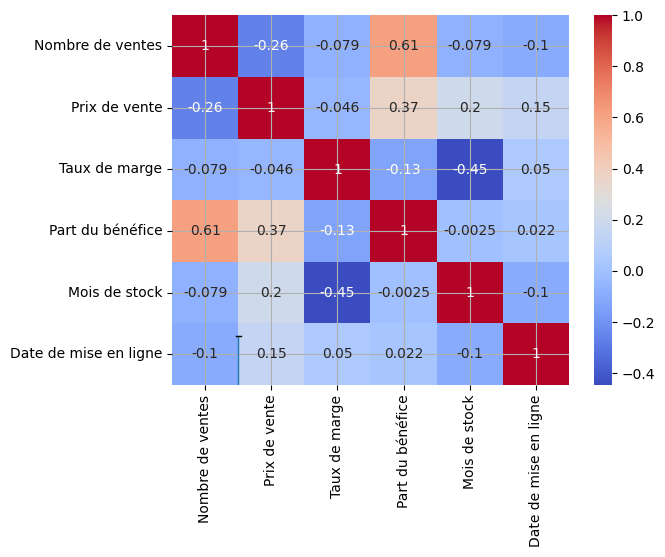

In [357]:
#Création d'un heatmap de correlation avec les variables stock, sales et price
corr = df_merge[['total_sales','price', 'Taux de marge', 'part_benefice', 'Nombre de mois de stock', 'post_date']].corr()
dict_rename = {'total_sales':'Nombre de ventes', 'price':'Prix de vente', 'Nombre de mois de stock':'Mois de stock',\
               'post_date':'Date de mise en ligne', 'part_CA':'Part du CA', 'part_benefice':'Part du bénéfice'}
corr.rename(dict_rename, axis=0, inplace = True)
corr.rename(dict_rename, axis=1, inplace = True)
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
#Afficher total_sales comme 'Nombre de ventes' et price comme 'Prix' dans la heatmap
plt.show()
# NB : corrélation proche de 1 pour la part du Ca et la part du bénéfice total
# Corrélation proche de 1 pour le prix et le pric d'achat

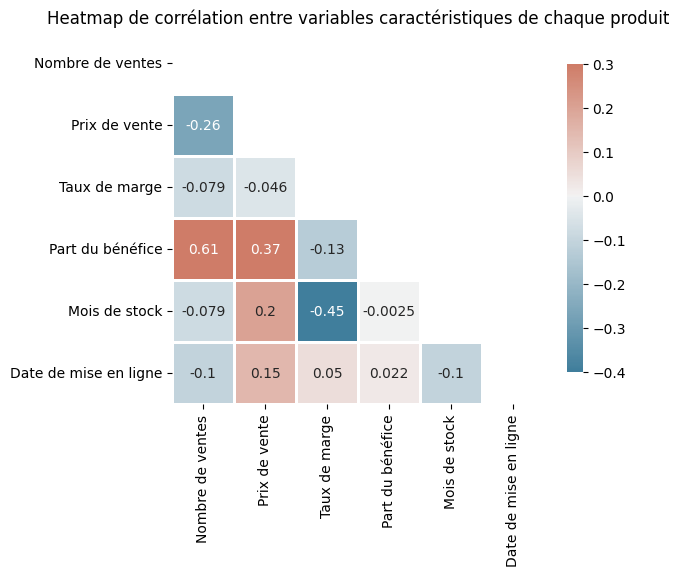

In [358]:
#on peut également créer un mask pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
# définition du graphique
f, ax = plt.subplots(figsize=(6, 8))
plt.title('Heatmap de corrélation entre variables caractéristiques de chaque produit')
# Definition d'une colormap lisible et des caractéristiques de l'affichage
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, vmin = -0.4 , annot = True, center=0, square=True, linewidths=2, cbar_kws={"shrink": .5})
plt.show()

In [359]:
#Que peut-on conclure des correlations ?

Rappel : les heatmaps affichent le coefficient corrélation linéaire de Pearson et sont donc adapté à des corrélation linéaires

- Corrélation positive marquée entre part du bénéfice et nombre de ventes (0.61), et prix de vente (0.37) : le nombre de ventes impacte plus le bénéfice qu'un prix élevé
- Corrélation négative marquée entre prix et nombre de ventes (-0.26) : les produits les plus chers sont les moins vendus - sauf pour le champagne (-0.023)

Faible corrélation entre: 
- Prix et marge (-0.045) : on marge autant sur les produits chers que sur les produits bon marché
- Mois de stock et prix de vente (-0.079) : bonne gestion des stocks a priori sauf pour le  champagne (-0.42)

Corrélations à confirmer grâce à  des heatmaps par produit grâce à une visualisation par des diagrammes à points


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.1 - Heatmap de corrélation par type de produit</h3>
</div>

In [360]:
#Synthèse du nombre d'article et de vente par produit de la base prugée des articles fantômes
df_products = pd.DataFrame()
df_products['Nombre de produits'] = df_merge.groupby('product_type').size()
df_products['Ventes'] = df_merge.groupby('product_type')['total_sales'].sum()
df_products = df_products.sort_values(by = 'Nombre de produits', ascending=False)
df_products

,Nombre de produits,Ventes
product_type,,
Vin,639,5749.0
Champagne,27,279.0
Whisky,13,48.0
Cognac,8,35.0
Huile d'olive,3,22.0
Gin,2,14.0


In [361]:
# Création d'un dictionnaire corr_dict de corrélation par type de produit
corr_dict = {}
for product_type in df_merge['product_type'].unique():
    mask = df_merge['product_type'] == product_type
    corr_dict[product_type] = df_merge[mask][['total_sales','price', 'Taux de marge', 'part_benefice', 'Nombre de mois de stock', 'post_date']].corr()
    corr_dict[product_type].rename(dict_rename, axis=0, inplace = True)
    corr_dict[product_type].rename(dict_rename, axis=1, inplace = True)

In [362]:
# On vérifie pour tous les produits que la corrélation entre part du CA et part du bénéfice est proche de 1
for product_type in df_merge['product_type'].unique():
    print(product_type)
    print(df_merge.loc[df_merge['product_type'] == product_type,['part_CA', 'part_benefice']].corr())
    print('\n')


Huile d'olive
                part_CA  part_benefice
part_CA        1.000000       0.999847
part_benefice  0.999847       1.000000


Champagne
               part_CA  part_benefice
part_CA        1.00000        0.99983
part_benefice  0.99983        1.00000


Vin
                part_CA  part_benefice
part_CA        1.000000       0.998149
part_benefice  0.998149       1.000000


Cognac
                part_CA  part_benefice
part_CA        1.000000       0.997379
part_benefice  0.997379       1.000000


Whisky
                part_CA  part_benefice
part_CA        1.000000       0.997934
part_benefice  0.997934       1.000000


Gin
               part_CA  part_benefice
part_CA            1.0            1.0
part_benefice      1.0            1.0




In [363]:
def heatmap_produit(p):
    '''Affichage de  la heatmap de corrélation pour un type de produit donné'''
    # Sélection des données concernant le produit donné p
    mask = np.triu(np.ones_like(corr_dict[p], dtype=bool))
    # définition des couleurs
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Définition du graphique
    f, ax = plt.subplots(figsize=(5, 6))
    plt.title('Heatmap de corrélation ({})'.format(p))
    # Affichage du graphique
    sns.heatmap(corr_dict[p], mask=mask, cmap=cmap, vmax=0.3, vmin = -0.4 , annot = True, center=0, square=True, linewidths=2, cbar_kws={"shrink": .5})
    plt.show()

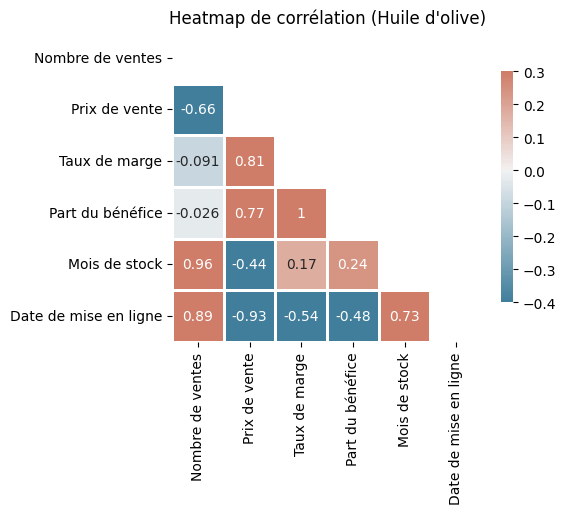

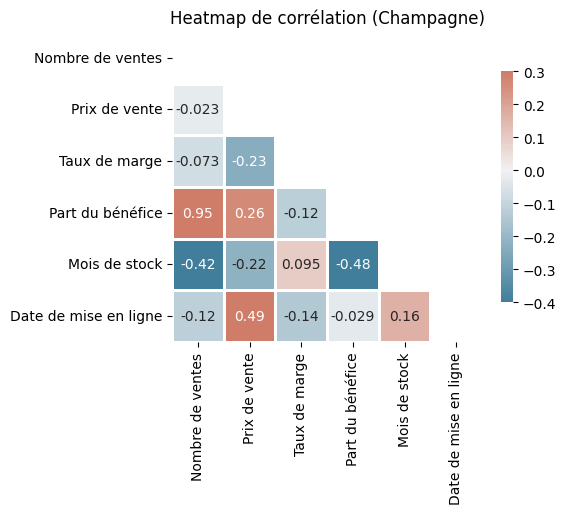

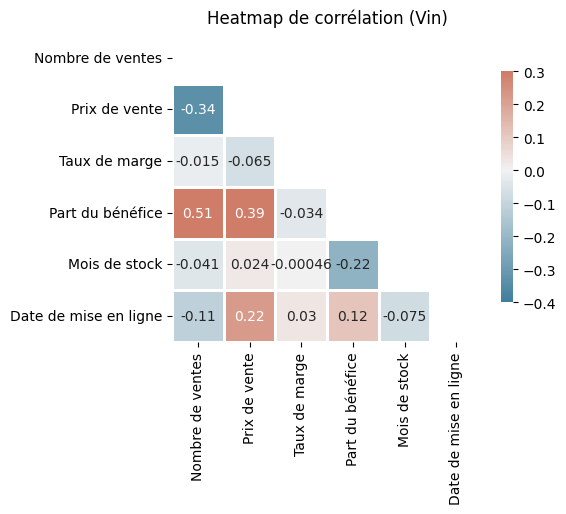

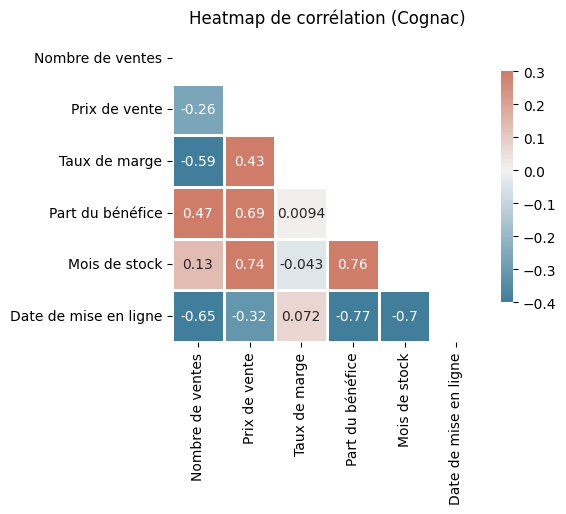

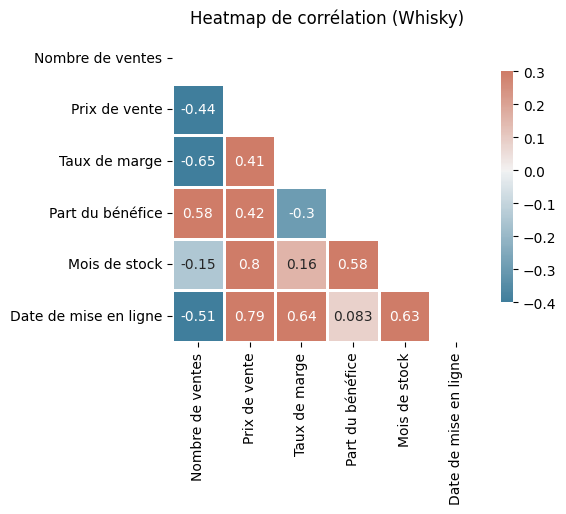

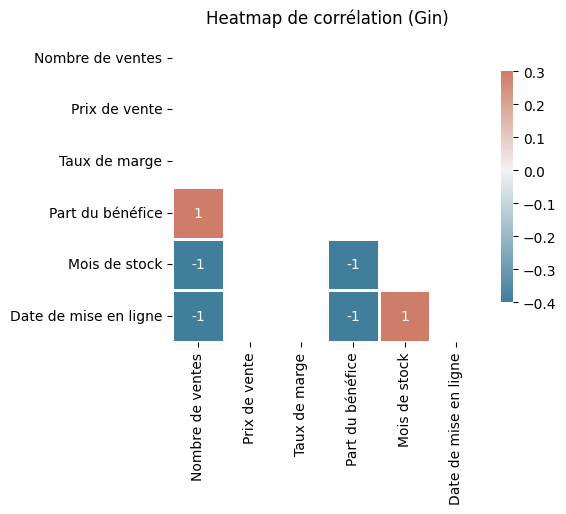

In [364]:
for p in df_merge['product_type'].unique():
    heatmap_produit(p)

- On observe de fortes différences entre les heatmaps de corrélation par type de produit.

- La forte corrélation négative observée entre marge et stocks est invalidée par la différenciation par type de produit.

- Certaines caractéristiques propres aux produits (saisonnalité, périssabilité, standing …), peuvent justifier une stratégie marketing et logistique différenciée


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.3 - Analyse des corrélations entre variables : diagrammes à points</h3>
</div>

On va vérifier et développer les corrélations relevées par les heatmaps à l'aide de diagramme de nuages de points

In [365]:
dict_rename['price'] = 'Prix de vente (€)'
dict_rename['product_type'] = 'Type de produit'
def nuage_correlation(df, v1, v2):
    '''Affichage du nuage de points de la corrélation entre 2 variables de df_merge'''
    fig = px.scatter(df, x=v1, y=v2, title="{} en fonction de {}".format(dict_rename[v2],dict_rename[v1]),\
        color="product_type", opacity=0.7, width=1000, height = 500, labels=dict_rename)
    return fig

In [366]:
fig = nuage_correlation(df_merge, 'price','total_sales')
fig.show()
# zoom
fig.update_xaxes(range=[0, 100])
fig.update_yaxes(range=[0, 40])
fig.update_layout(height = 400)
fig.show()

Validation des deux hypothèses : 
- Courbe décroissante du nombre du vente en fonction du prix
- Nombre de ventes de champagne constante en fonction du prix

On rappelle que la marge est faible sur le champagne : il pourrait être intéressant d’étudier comment une augmentation des marges impacterait les ventes sur le champagne


In [367]:
# Affichage pour le champagne seul
v1 = 'price'
v2 = 'total_sales'
fig = px.scatter(df_merge.loc[df_merge['product_type'] == 'Champagne'], x=v1, y=v2, title="{} en fonction de {} (Champagne)".format(dict_rename[v2],dict_rename[v1]),\
        opacity=0.7, width=1000, height = 400, labels=dict_rename)
fig.show()

In [368]:
fig = nuage_correlation(df_merge, 'price','part_benefice')
fig.show()
# zoom
fig.update_xaxes(range=[0, 200])
fig.update_yaxes(range=[0, 0.01])
fig.update_layout(height = 400)
fig.show()

On valide une corrélation positive entre part du bénéfice et prix de vente

Des produits bon marché comme des produits plus chers se démarquent comme produits « stars » au niveau du bénéfice des ventes : une attention particulière doit leur être portée

In [369]:
fig = nuage_correlation(df_merge, 'total_sales','part_benefice')
fig.show()
# zoom
fig.update_yaxes(range=[0, 0.015])
fig.update_xaxes(range=[0, 25])
fig.update_layout(height = 600)
fig.show()

La corrélation peu linéaire : on note que le bénéfice maximal est obtenu pour les produits vendus autour de 6 articles par mois


On propose donc les préconisation suivantes :
- Augmenter la marge des produits à faible marge très vendus, qui participent peu au bénéfice
- Se concentrer sur les produits qui participent le plus au bénéfice : seuil de part du bénéfice à définir afin d’analyser les produits situés en deçà?


Limite de l’analyse : On travaille sur une marge brute ne prenant pas en compte ni les coûts fixes, ni les coûts linéaires de stockage et de main d’œuvre (plus pertes etc)
- Les produits les plus vendus sont ainsi favorisés dans cette analyse
- Il serait pertinent de reprendre l’analyse avec la marge nette des produits


In [370]:
fig = nuage_correlation(df_merge,'total_sales', 'Nombre de mois de stock')
fig.show()
#zoom
fig.update_xaxes(range=[0, 25])
fig.update_layout(height = 700)
fig.show()

- Tous les produits présentent environ 2 mois de stock, ce qui semble cohérent.

- Les ruptures de stock seraient à analyser afin de les éviter au maximum.

- Une règle pourrait être fixée pour uniformiser au maximum le nombre de mois de stock de chaque produit (vers 2 mois?)

- Les stocks de champagne sont en revanche très importants et représentent un volume financier conséquent  : il conviendrait de vérifier si cet état de fait est justifié par la stratégie de l’entreprise


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 7 - Exportation des données</h2>
</div>

In [371]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_merge.to_excel('data/2020_10_31_vente_produits.xlsx', index = True)